In [1]:
import cv2
import numpy as np
import pylab
import random

data/047.jpg
(512, 612, 3)


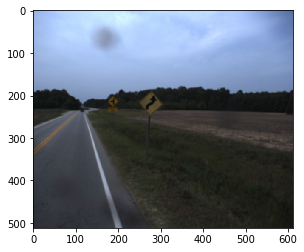

hsv


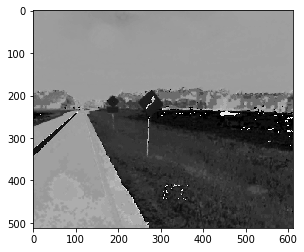

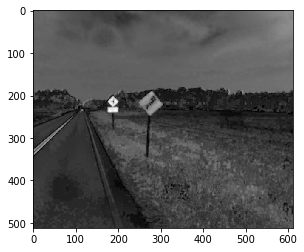

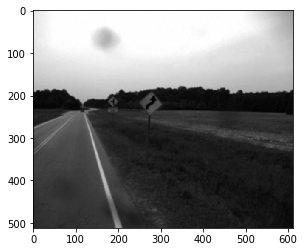

In [2]:
#im = cv2.imread("data/047.jpg")
#file = "data/{:03d}.jpg".format(random.randint(1,404))
file = "data/047.jpg"
print(file)
im = cv2.imread(file)
im = cv2.resize(im, (0,0), fx=0.5, fy=0.5)
im = cv2.GaussianBlur(im, (5, 5), 0)
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(im.shape)

#im_wob = im.copy()
#im_wob[:, :, 0] = 0

#display
pylab.imshow(im_rgb)
pylab.show()
print("hsv")
pylab.imshow(im_hsv[:,:,0], cmap=pylab.gray())
pylab.show()
pylab.imshow(im_hsv[:,:,1], cmap=pylab.gray())
pylab.show()
pylab.imshow(im_hsv[:,:,2], cmap=pylab.gray())
pylab.show()

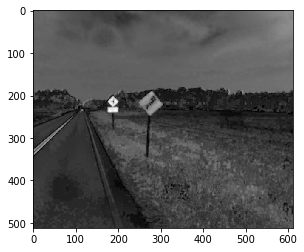

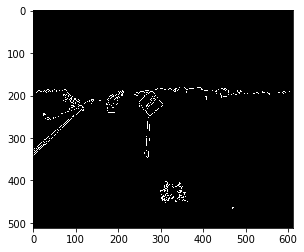

True

In [14]:
im_edges = cv2.Canny(im_hsv[:,:,1], 40, 250)
pylab.imshow(im_hsv[:,:,1], cmap=pylab.gray())
pylab.show()
pylab.imshow(im_edges, cmap=pylab.gray())
pylab.show()
cv2.imwrite("edges.png", im_edges)

In [4]:
def draw_lines(lines, img):
    diag = np.linalg.norm(img.shape)
    for line in lines:
        d, theta = line[0]
        a = theta
        theta_pi_over_two = int(np.floor(diag / 4.0))
        theta_pi = int(np.floor(diag / 2.0))
        # compute position of two point on the line
        if theta % theta_pi == theta_pi_over_two:
            p1 = np.array([diag, d], dtype=int)
        else:
            p1 = np.array([int(d / np.cos(a)), 0], dtype=int)
        if theta % theta_pi == 0:
            p2 = np.array([d, diag], dtype=int)
        else:
            p2 = np.array([0, int(d / np.sin(a))], dtype=int)
        # ensure that the line between the two points is in the screen
        if p1[0] < 0:
            p1 += (p2 - p1)
        if p2[1] < 0:
            p2 += (p1 - p2)
        cv2.line(img, tuple(p1), tuple(p2), (0, 255, 0), 2)
    return img

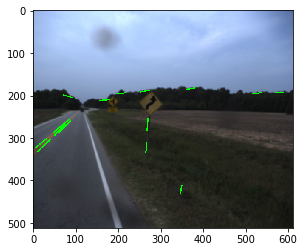

True

In [31]:
#lines = cv2.HoughLines(im_edges,1,np.pi/180,40)
lines = cv2.HoughLinesP(im_edges,1,np.pi/45,-1,minLineLength=20,maxLineGap=3)
im_lines = im_rgb.copy()
#draw_lines(lines, im_lines)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(im_lines,(x1,y1),(x2,y2),(0,255,0),2)
pylab.imshow(im_lines)
pylab.show()
cv2.imwrite("lines.png", cv2.cvtColor(im_lines, cv2.COLOR_RGB2BGR))

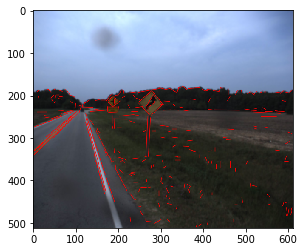

True

In [40]:
lsd = cv2.createLineSegmentDetector(0)
dlines = lsd.detect(im_hsv[:,:,1])
drawn_im = im_rgb.copy()
for dline in dlines[0]:
    x0 = int(round(dline[0][0]))
    y0 = int(round(dline[0][1]))
    x1 = int(round(dline[0][2]))
    y1 = int(round(dline[0][3]))
    cv2.line(drawn_im, (x0, y0), (x1,y1), 255, 1, cv2.LINE_AA)
pylab.imshow(drawn_im)
pylab.show()
cv2.imwrite("linesd.png", cv2.cvtColor(drawn_im, cv2.COLOR_RGB2BGR))

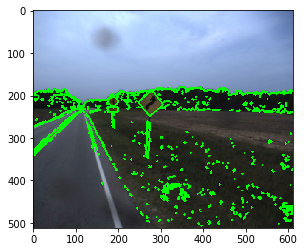

True

In [6]:
_, contours, _ = cv2.findContours(im_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imc = cv2.drawContours(im_rgb.copy(), contours, -1, (0,255,0), 3)
pylab.imshow(imc)
pylab.show()
cv2.imwrite("contours.png", cv2.cvtColor(imc, cv2.COLOR_RGB2BGR))